In [2]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [48]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
for row in session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).limit(20):
    print(row)

('2010-06-01', 78.0)
('2010-06-02', 76.0)
('2010-06-03', 78.0)
('2010-06-04', 76.0)
('2010-06-05', 77.0)
('2010-06-06', 78.0)
('2010-06-07', 77.0)
('2010-06-08', 78.0)
('2010-06-09', 78.0)
('2010-06-10', 79.0)
('2010-06-11', 78.0)
('2010-06-12', 78.0)
('2010-06-13', 78.0)
('2010-06-14', 77.0)
('2010-06-15', 78.0)
('2010-06-16', 78.0)
('2010-06-17', 77.0)
('2010-06-18', 77.0)
('2010-06-19', 82.0)
('2010-06-20', 78.0)


In [35]:
#  3. Convert the June temperatures to a list.
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

In [36]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(results_june, columns=['date','temperature'])
june_df = june_df.set_axis(['date',"June Temps"], axis=1)
june_df.set_index(june_df['date'], inplace=True)

In [37]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [39]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
for row in session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).limit(10):
    print(row)

('2010-12-01', 76.0)
('2010-12-03', 74.0)
('2010-12-04', 74.0)
('2010-12-06', 64.0)
('2010-12-07', 64.0)
('2010-12-08', 67.0)
('2010-12-09', 77.0)
('2010-12-10', 66.0)
('2010-12-11', 69.0)
('2010-12-12', 68.0)


In [11]:
# 7. Convert the December temperatures to a list.
results_december = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(results_december, columns=['date','temperature'])
december_df = december_df.set_axis(['date',"December Temps"], axis=1)
december_df.set_index(december_df['date'], inplace=True)

In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
# Additional Queries

In [72]:
# June precipitation
# 2. Write a query that filters the Measurement table to retrieve the percipitation for the month of June. 
for row in session.query(Measurement.date, Measurement.prcp,Station.name).filter(extract('month',Measurement.date)==6).limit(10):
    print(row)

('2010-06-01', 0.0, 'WAIKIKI 717.2, HI US')
('2010-06-01', 0.0, 'KANEOHE 838.1, HI US')
('2010-06-01', 0.0, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
('2010-06-01', 0.0, 'PEARL CITY, HI US')
('2010-06-01', 0.0, 'UPPER WAHIAWA 874.3, HI US')
('2010-06-01', 0.0, 'WAIMANALO EXPERIMENTAL FARM, HI US')
('2010-06-01', 0.0, 'WAIHEE 837.5, HI US')
('2010-06-01', 0.0, 'HONOLULU OBSERVATORY 702.2, HI US')
('2010-06-01', 0.0, 'MANOA LYON ARBO 785.2, HI US')
('2010-06-02', 0.01, 'WAIKIKI 717.2, HI US')


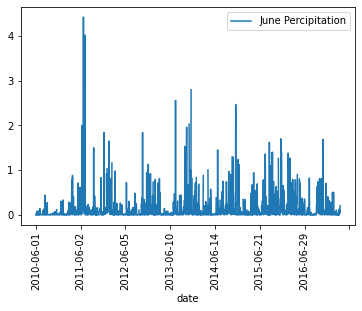

In [73]:
results_june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==6).all() 
june_df_prcp = pd.DataFrame(results_june_prcp, columns=['date','precipitation'])
june_df_prcp = june_df_prcp.set_axis(['date',"June precipitation"], axis=1)
june_df_prcp.set_index(june_df_prcp['date'], inplace=True)
df = june_df_prcp.sort_index()
import matplotlib.pyplot as plt
df.plot()
plt.xticks(rotation='vertical')
plt.show()

In [74]:
# December precipitation
# 6. Write a query that filters the Measurement table to retrieve the percipitation for the month of December.
for row in session.query(Measurement.date, Measurement.prcp,Station.name).filter(extract('month',Measurement.date)==12).limit(10):
    print(row)

('2010-12-01', 0.04, 'WAIKIKI 717.2, HI US')
('2010-12-01', 0.04, 'KANEOHE 838.1, HI US')
('2010-12-01', 0.04, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
('2010-12-01', 0.04, 'PEARL CITY, HI US')
('2010-12-01', 0.04, 'UPPER WAHIAWA 874.3, HI US')
('2010-12-01', 0.04, 'WAIMANALO EXPERIMENTAL FARM, HI US')
('2010-12-01', 0.04, 'WAIHEE 837.5, HI US')
('2010-12-01', 0.04, 'HONOLULU OBSERVATORY 702.2, HI US')
('2010-12-01', 0.04, 'MANOA LYON ARBO 785.2, HI US')
('2010-12-03', 0.0, 'WAIKIKI 717.2, HI US')


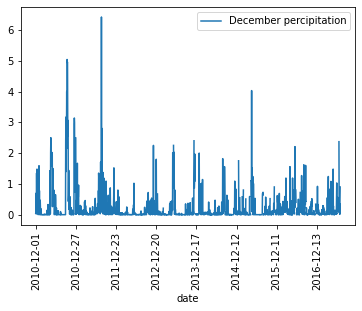

In [75]:
results_december_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)==12).all() 
december_df_prcp = pd.DataFrame(results_december_prcp, columns=['date','precipitation'])
december_df_prcp = december_df_prcp.set_axis(['date',"December precipitation"], axis=1)
december_df_prcp.set_index(december_df_prcp['date'], inplace=True)
df = december_df_prcp.sort_index()
df.plot()
plt.xticks(rotation='vertical')
plt.show()

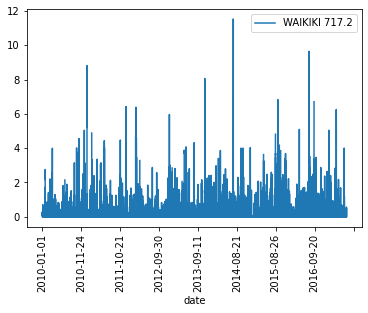

In [76]:
# Station precipitation
results_station_prcp = session.query(Measurement.date, Measurement.prcp).filter(Station.name=='WAIKIKI 717.2, HI US').all() 
station_df_prcp = pd.DataFrame(results_station_prcp, columns=['date','percipitation'])
station_df_prcp = station_df_prcp.set_axis(['date',"WAIKIKI 717.2"], axis=1)
station_df_prcp.set_index(station_df_prcp['date'], inplace=True)
df = station_df_prcp.sort_index()
df.plot()
plt.xticks(rotation='vertical')
plt.show()